In [2]:
!pip install python-bcb --no-cache-dir

In [3]:
from bcb import sgs
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Função para coleta de dados
'''
SGS - Sistema Gerenciador de Séries Temporais - v2.1
https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
'''
df = sgs.get({'SELIC':11})

In [5]:

#Verificando os dados
'''
Retorne o indice da taxa selic por ano
'''
df

,SELIC
Date,
1986-06-04,0.065041
1986-06-05,0.067397
1986-06-06,0.066740
1986-06-09,0.068247
1986-06-10,0.067041
...,...
2023-02-27,0.050788
2023-02-28,0.050788
2023-03-01,0.050788


In [6]:
#Estatistica descritiva
'''
Apresenta algumas informações estatísticas de nosso dataframe
'''
df.describe()


,SELIC
count,9212.000000
mean,0.267908
std,0.482869
min,0.000000
25%,0.041063
50%,0.060571
75%,0.138333
max,3.626000


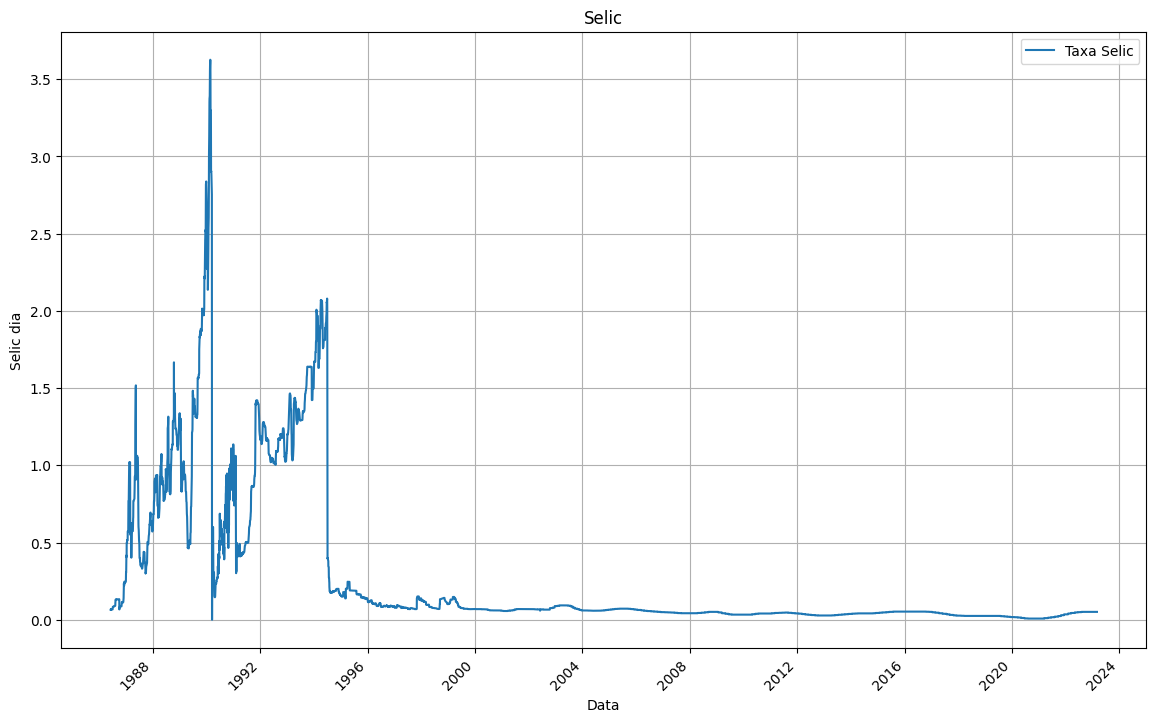

In [7]:
#Tamanho da imagem
plt.figure(figsize=(14,8))
# Dados da Selic durante o período
plt.plot(df.index, df)
plt.xticks(rotation=45, ha='right')
plt.title('Selic')
plt.legend(['Taxa Selic',])
plt.xlabel('Data')
plt.ylabel('Selic dia')
plt.grid()

In [8]:
# Retorna a porcentagem de variação da selic por ano
df = sgs.get({'SELIC':11}).pct_change()

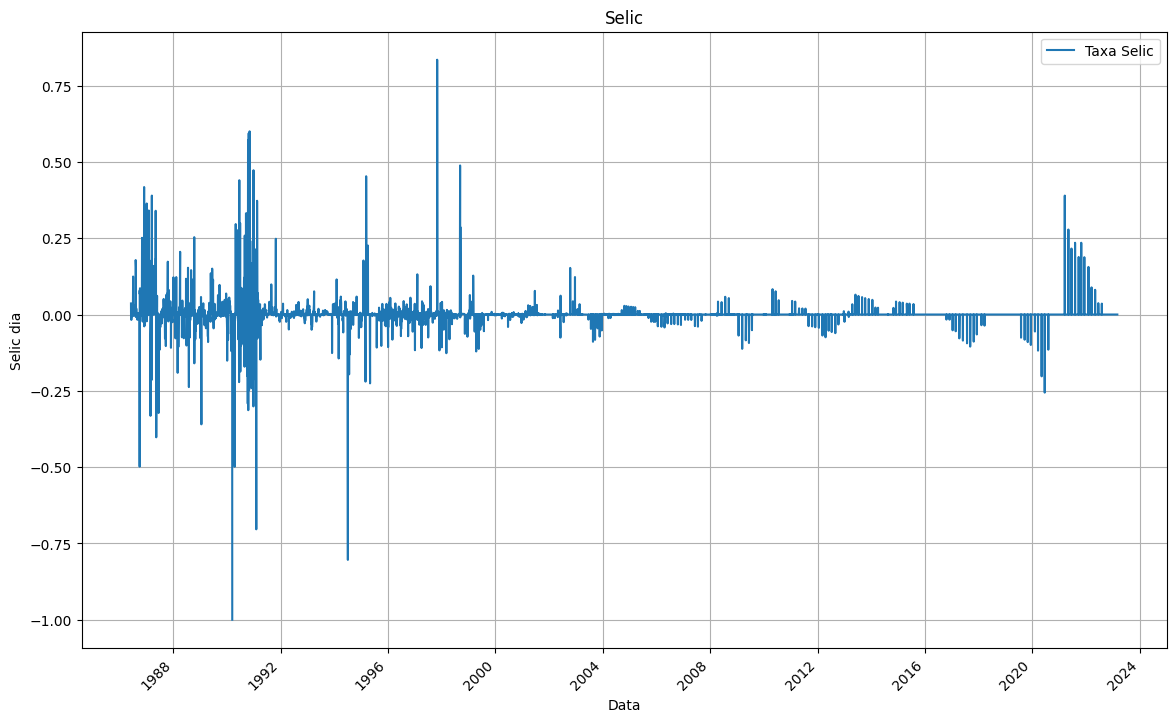

In [9]:
#Tamanho da imagem
plt.figure(figsize=(14,8))
# Dados da Selic durante o período
plt.plot(df.index, df)
plt.xticks(rotation=45, ha='right')
plt.title('Selic')
plt.legend(['Taxa Selic',])
plt.xlabel('Data')
plt.ylabel('Selic dia')
plt.grid()

In [10]:
# Acessando a variação da porcentagem ao longo do ultimo governo
# Retorna a porcentagem de variação da selic por ano
df = sgs.get({'SELIC':11}).pct_change().loc['2019-01-01':]


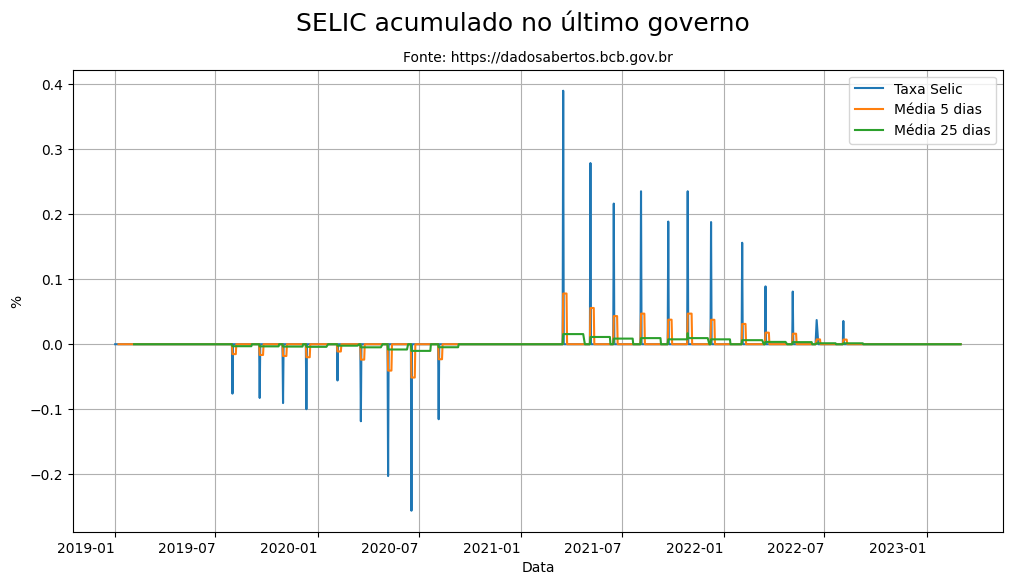

In [11]:
from pandas.core import window
periodo = 5

#Tamanho da imagem
plt.figure(figsize=(12,6))
# Dados da Selic durante o período
plt.plot(df.index, df)
# # Dados da média 5 dias
plt.plot(df.rolling(window=periodo).mean())
# # Dados da média 25 dias
plt.plot(df.rolling(window=periodo+20).mean())
plt.xticks(rotation=0, ha='right')
plt.title('Fonte: https://dadosabertos.bcb.gov.br', fontsize=10)
plt.suptitle('SELIC acumulado no último governo', fontsize=18)
plt.legend(['Taxa Selic','Média 5 dias','Média 25 dias'])
plt.xlabel('Data')
plt.ylabel('%')
plt.grid()